<a href="https://colab.research.google.com/github/sitharavs/Air-Quality-Analysis/blob/main/Confidence_Interval_Air_Quality_Index(USA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Confidence Level in Statistics

Ripple Renewable Energy (RRE) - operates in the following U.S. states: California ,Florida , Michigan , Ohio , Pennsylvania , Texas. So we will drill down our analysis in these states.

This notebook analyzes air quality data (AQI) for different US states,
particularly focusing on states where Ripple Renewable Energy (RRE) operates.

I have calculated the mean AQI for these states, constructed a boxplot to visualize AQI distribution, and finally determines a confidence interval for the
state with the highest mean AQI (California) to understand the level of
certainty around that mean.

This analysis helps identify potential impact
of policies related to air quality on RRE's operations in different states.



# KEY TAKEAWAYS -  
1. Exploratory Data Analysis
2. Mean in the dataset (conceptually)
3. Exploring box plots
4. Sample statistics, confidence level, z-scores, margin of error, intervals(upper limits & lower limits), validation with stats formulas in Scipy

## EDA - Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aqi = pd.read_csv('/content/aqi.csv')
print(aqi.head())

        State  Year  Days with AQI  Good Days  Moderate Days  \
0  California  2023            365        247            112   
1      Oregon  2023            365        205            129   
2  California  2023            365        106            236   
3     Arizona  2023            365         31            248   
4  California  2023            365         35            189   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    5               0                    0   
1                                   10              11                    7   
2                                   13               3                    1   
3                                   74              10                    1   
4                                   78              49                   10   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               1     1435                   64          45        0

In [ ]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                499 non-null    object
 1   Year                                 499 non-null    int64 
 2   Days with AQI                        499 non-null    int64 
 3   Good Days                            499 non-null    int64 
 4   Moderate Days                        499 non-null    int64 
 5   Unhealthy for Sensitive Groups Days  499 non-null    int64 
 6   Unhealthy Days                       499 non-null    int64 
 7   Very Unhealthy Days                  499 non-null    int64 
 8   Hazardous Days                       499 non-null    int64 
 9   Max AQI                              499 non-null    int64 
 10  90th Percentile AQI                  499 non-null    int64 
 11  Median AQI                           499 non-

In [ ]:
print('For more thorough infor regarding states, use valuecounts()')
print(aqi['State'].value_counts().sort_index(ascending=True))

For more thorough infor regarding states, use valuecounts()
State
Alabama            9
Alaska             3
Arizona           10
Arkansas           7
California        37
Colorado          10
Connecticut        5
Delaware           2
Florida           22
Georgia           16
Hawaii             3
Idaho              8
Illinois          11
Indiana           15
Iowa               9
Kansas             4
Kentucky           9
Louisiana          9
Maine              4
Maryland           3
Massachusetts      6
Michigan          17
Minnesota         10
Mississippi        7
Missouri           6
Montana            8
Nebraska           5
Nevada             8
New Hampshire      4
New Jersey         4
New Mexico        12
New York           9
North Carolina    15
North Dakota       4
Ohio              21
Oklahoma           8
Oregon            12
Pennsylvania      20
Puerto Rico        4
Rhode Island       1
South Carolina     7
South Dakota       9
Tennessee         14
Texas             24
Utah      

In [ ]:
#no of unique states
aqi['State'].nunique()

51

In [ ]:
#describe aqi
aqi.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,499.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2023.0,339.797595,213.695391,118.144289,6.138277,1.378758,0.318637,0.122244,163.611222,67.146293,43.529058,0.328657,0.947896,144.577154,182.525050,11.418838
std,0.0,61.180170,71.363115,68.902842,9.266845,3.338174,0.873915,1.447573,102.610099,16.066523,10.195117,4.617085,4.859191,104.778556,114.931448,46.337193
min,2023.0,59.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,357.000000,168.000000,54.500000,1.000000,0.000000,0.000000,0.000000,110.500000,58.000000,39.000000,0.000000,0.000000,72.000000,93.000000,0.000000
50%,2023.0,365.000000,213.000000,119.000000,3.000000,0.000000,0.000000,0.000000,147.000000,66.000000,44.000000,0.000000,0.000000,137.000000,205.000000,0.000000
75%,2023.0,365.000000,265.000000,169.500000,8.000000,2.000000,0.000000,0.000000,188.500000,74.000000,50.000000,0.000000,0.000000,212.500000,261.000000,0.000000
max,2023.0,365.000000,365.000000,290.000000,78.000000,49.000000,10.000000,31.000000,1435.000000,174.000000,81.000000,93.000000,93.000000,365.000000,365.000000,365.000000


# Basics of the dataset

Question 1: When was the data recorded ?
Answer : Entire year 2023

Question 2: What is the max value of AQI?
Answer : 1435 in California

# Performing Statistical tests

# Question 1 : Provide a summary of the mean AQI for the states in which RRE operates.


In [ ]:
# Summarize the mean AQI for RRE states.
# Create a list of RRE states.

rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['State'].isin(rre_states)]
#renaming column
aqi_rre.rename(columns={"Max AQI": 'AQI'}, inplace = True)
# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['State']).agg({"AQI":"mean","State":"count"})

<ipython-input-7-86e1d7a1d2ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_rre.rename(columns={"Max AQI": 'AQI'}, inplace = True)


,AQI,State
State,,
California,215.459459,37
Florida,111.090909,22
Michigan,177.764706,17
Ohio,179.047619,21
Pennsylvania,198.250000,20
Texas,131.458333,24


# Question 2 : Construct a boxplot visualization for AQI of these states using seaborn .


<Axes: xlabel='State', ylabel='AQI'>

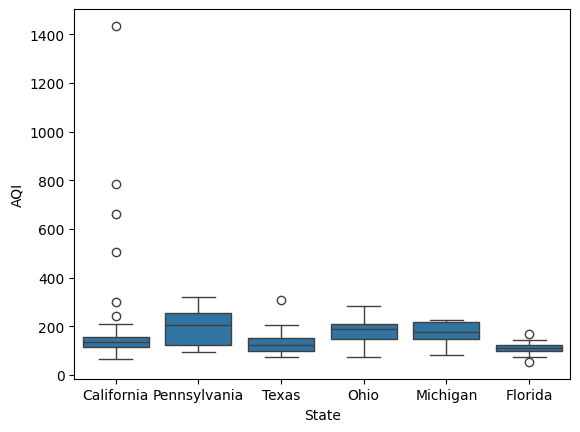

In [ ]:
import seaborn as sns
#construct a box plot

sns.boxplot(x=aqi_rre['State'],y=aqi_rre['AQI'])

Question: Based on the data and the visualizations, which state(s) do we suspect will be most affected by this policy?
Answer : Pennsylvania as the range is between 150 & 300 and mean is over 200.


# Question 3 :  Construct a confidence interval for the RRE state with the highest mean AQI.


Recall the four-step process for constructing a confidence interval:
1. Identify a sample statistic.
2. Choose a confidence level.
3. Find the margin of error.
4. Calculate the interval.
5. Validation with formulas

In [ ]:
# Step 1 : Construct Sample statitics
# choosing California as a subset

aqi_cali = aqi[aqi['State'] == 'California']

#finding mean for california

cali_mean = aqi_cali['Max AQI'].mean()
print(cali_mean)

215.45945945945945


In [ ]:
# Step 2 : Choosing your confidence intervals

# input your confidence interval , choose 0.9, 0.95 or 0.99

confidence = 0.95
print(confidence)





0.95


Find your margin of error (ME)

margin of error = z * standard error, where z is the appropriate z-value for the given confidence level.

To calculate your margin of error:
1. Find your z-value.
2. Find the approximate z for common confidence levels.
3. Calculate your standard error estimate.



*   z score for 0.90 CI = 1.65
*   z score for 0.95 CI = 1.96
*   z score for 0.99 CI = 2.58


In [ ]:
# Step 3: Find margin of error

# Begin by identifying the z associated with your chosen confidence level.

def z_value(confidence):
  if confidence == 0.90:
    return 1.65
  elif confidence == 0.95:
    return 1.96
  elif confidence == 0.99:
    return 2.58

# Next, calculate your standard error.

standard_error = aqi_cali['Max AQI'].std() / np.sqrt(aqi_cali.shape[0])
print("Standard Error = ", standard_error)

# Finally, calculate your margin of error.

margin_of_error = z_value(confidence) * standard_error
print("Margin of Error = ", margin_of_error)

Standard Error =  42.03444166606796
Margin of Error =  82.38750566549321


In [ ]:
# Step 4 : Calculate your interval
# [Calculate both a lower and upper limit surrounding your sample mean to create your interval]

ll = cali_mean - margin_of_error
ul = cali_mean + margin_of_error

print("Lower Limit = ", ll)
print("Upper Limit = ", ul)


Lower Limit =  133.07195379396626
Upper Limit =  297.84696512495265


In [ ]:
# Step 5 : Validation with formulas

# import stats from scipy

from scipy import stats

# The stats.norm.interval() function expects the confidence level, not alpha.
# Replace 'alpha' with 'confidence' and pass the confidence value.
validation = stats.norm.interval(confidence=confidence, loc=cali_mean, scale=standard_error)

print(validation)

(133.07346768371642, 297.8454512352025)
